In [30]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import tensorflow as tf

##### SETUP

In [31]:
#@title Install required libraries

!pip install keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [32]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as numpy
import pandas as panda

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf

import kagglehub

In [33]:
#@title Mempersiapkan dataset
path = kagglehub.dataset_download("fuadkahfi/dataset-tanah")+"/Tanah"
print(path)

batch = 80 #@param
p = 256 #@param
l = 256 #@param
split = 0.2 # @param {"type":"number"}

training_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=batch,

    validation_split=split, #80% dataset yang akan di latih
    subset="training",
    seed=1,

    image_size=(p, l),
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=batch,

    validation_split=split, #20% dataset yang akan diuji
    subset="validation",
    seed=1,

    image_size=(p, l),
    shuffle=True
)


/kaggle/input/dataset-tanah/Tanah
Found 880 files belonging to 8 classes.
Using 704 files for training.
Found 880 files belonging to 8 classes.
Using 176 files for validation.


In [34]:
#@title Membuat model

jenis = len(training_dataset.class_names)
droput = 0.3 #@param

augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.025),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomBrightness(0.1),
])

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(p, l, 3)),
    tf.keras.layers.Rescaling(1./255),
    # augmentation,

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
#    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
 #   tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(droput),
    tf.keras.layers.GlobalAveragePooling2D(), # Add this layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(droput),
    tf.keras.layers.Dense(8, activation='softmax')
])

In [35]:
#@title Melatih model dan validaasi model

rate = 0.001 # @param {"type":"number"}
epoch = 30 # @param {"type":"integer"}

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=rate),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=epoch
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 86s 8s/step - accuracy: 0.1208 - loss: 2.0716 - val_accuracy: 0.3352 - val_loss: 2.0336
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 137s 9s/step - accuracy: 0.1580 - loss: 2.0306 - val_accuracy: 0.2898 - val_loss: 1.9729
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 78s 8s/step - accuracy: 0.3271 - loss: 1.9500 - val_accuracy: 0.4489 - val_loss: 1.8466
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 126s 14s/step - accuracy: 0.3756 - loss: 1.8319 - val_accuracy: 0.4375 - val_loss: 1.6649
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 105s 9s/step - accuracy: 0.4148 - loss: 1.6719 - val_accuracy: 0.4545 - val_loss: 1.5033
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.4346 - loss: 1.5266 - val_accuracy: 0.5227 - val_loss: 1.3837
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.4430 - loss: 1.4357 - val_accuracy: 0.5057 - val_loss: 1.3231
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.4365 - loss: 1.4227 - val_accuracy: 0.5398 - val_loss: 1.2846
Epoc

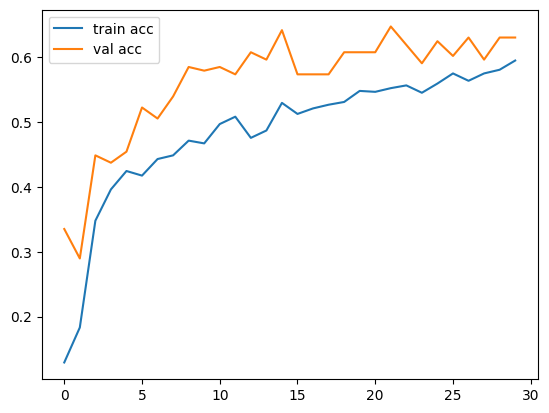

In [36]:
#@title Statistik
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Image classification with TensorFlow Lite Model Maker with TensorFlow 2.18.0

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This notebook has been moved [here](https://www.tensorflow.org/lite/tutorials/model_maker_image_classification).

In [37]:

print(tf.__version__)

2.18.0


https://colab.research.google.com/github/TrainingBear/OPSI-Project-AndroidApplication/blob/master/tensorflow_examples/lite/model_maker/demo/image_classification.ipynb#scrollTo=w7AdazbUlvDJ